In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
train_samples = 5000

In [5]:
random_state = check_random_state(1)
random_state

RandomState(MT19937) at 0x7FAD46F63C00

In [6]:
permutation = random_state.permutation(X.shape[0])
permutation

array([ 6670, 49567, 50796, ..., 21440, 50057,  5192])

In [7]:
X = X[permutation]
y = y[permutation]
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['6', '2', '7', ..., '5', '0', '0'], dtype=object))

In [8]:
X = X.reshape((X.shape[0], -1))
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)

In [12]:
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Sparsity with L2 penalty: 16.58%
Test score with L2 penalty: 0.8647


In [13]:
coef = clf.coef_.copy()
coef

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

<Figure size 720x360 with 0 Axes>

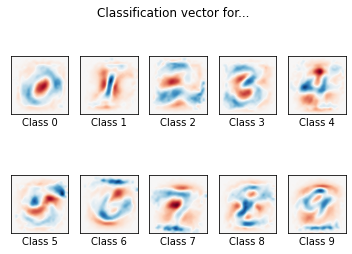

In [15]:
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='spline36',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()